# Heart disease classification

## Aknowledgement:

The original dataset comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/45/heart+disease).

The formated version of it (the one used here) comes from the kaggle database: [Cleveland Clinic Heart Disease Dataset](https://www.kaggle.com/datasets/aavigan/cleveland-clinic-heart-disease-dataset).

The data was collected by Robert Detrano, M.D., Ph.D of the Cleveland Clinic Foundation.

## Dataset legend:
The following explains the features of the dataset used:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    + 0: Typical angina: chest pain related decrease blood supply to the heart
    + 1: Atypical angina: chest pain not related to heart
    + 2: Non-anginal pain: typically esophageal spasms (non heart related)
    + 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    + anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    + serum = LDL + HDL + .2 * triglycerides
    + above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    + '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    + 0: Nothing to note
    + 1: ST-T Wave abnormality
        + can range from mild symptoms to severe problems
        + signals non-normal heart beat
    + 2: Possible or definite left ventricular hypertrophy
        + Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    + looks at stress of heart during excercise
    + unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    + 0: Upsloping: better heart rate with excercise (uncommon)
    + 1: Flatsloping: minimal change (typical healthy heart)
    + 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    + colored vessel means the doctor can see the blood passing through
    + the more blood movement the better (no clots)
13. thal - thalium stress result
    + 1,3: normal
    + 6: fixed defect: used to be defect but ok now
    + 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Goal:
This is a classification problem utilizing a dataframe of 303 entries. The goal is to test certain classification models in order to find one that predicts a heart disease with the most accuracy.
We need to pick the correct model that fits our issue. To call the model successful, it would have to score relatively high on accuracy (let's say above 90%), since the dataset is healthcare-related.
 

For the purpose of model selection, we can use [sklearn decision tree](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Lets assume a starting estimator to be somewhere between Linear, KNN or ensemble models.

### Import packages:

In [1]:
# EDA:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical operations
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report

# In order to supress warnings, and cleanup notebook at the end
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


We need to check for data types and mising values

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data appears to be already cleaned of missing values

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.shape

(303, 14)

In [7]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

The amount of healthy and ill population in the dataset is roughly the same.

## Exploratory Data Analysis:

Lets take a look on how much the target is influenced by sex.

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [11]:
print('Chances of the patient not having heart disease based on the given data:\n'
    f'{24*100/(72+24):.2f}% if the patient was female,\n'
    f'{114*100/(114+93):.2f}% if the patient was male')

Chances of the patient not having heart disease based on the given data:
25.00% if the patient was female,
55.07% if the patient was male


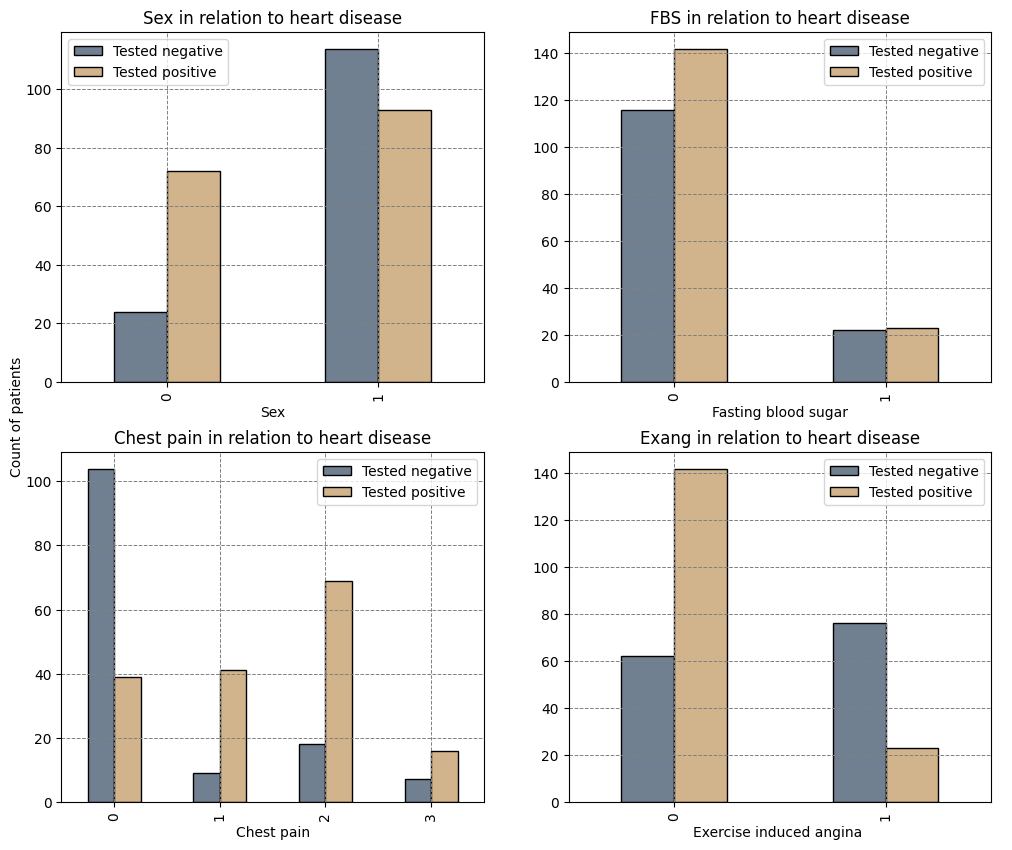

In [12]:
# Set up subplots
fig, ax = plt.subplots(2,2, figsize = (12,10))

# Create outer frame:
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel("Count of patients")

# Sex vs target:
pd.crosstab(df["sex"], df['target']).plot(kind='bar', ax=ax[0][0],
                                          edgecolor='black', linewidth=1,
                                          color = ['slategray','tan'])
ax[0][0].legend(['Tested negative','Tested positive'])
ax[0][0].set_title("Sex in relation to heart disease")
ax[0][0].set_xlabel("Sex")
ax[0][0].grid(True, color='grey', linewidth=0.7, linestyle='--')

# fbs vs target:
pd.crosstab(df["fbs"], df['target']).plot(kind='bar', ax=ax[0][1],
                                          edgecolor='black', linewidth=1,
                                          color = ['slategray','tan'])
ax[0][1].legend(['Tested negative','Tested positive'])
ax[0][1].set_title("FBS in relation to heart disease")
ax[0][1].set_xlabel("Fasting blood sugar")
ax[0][1].grid(True, color='grey', linewidth=0.7, linestyle='--')

# chest pain vs target:
pd.crosstab(df["cp"], df['target']).plot(kind='bar', ax=ax[1][0],
                                         edgecolor='black', linewidth=1,
                                         color = ['slategray','tan'])
ax[1][0].legend(['Tested negative','Tested positive'])
ax[1][0].set_title("Chest pain in relation to heart disease")
ax[1][0].set_xlabel("Chest pain")
ax[1][0].grid(True, color='grey', linewidth=0.7, linestyle='--')

# exercise induced angina vs target
pd.crosstab(df["exang"], df['target']).plot(kind='bar', ax=ax[1][1],
                                            edgecolor='black', linewidth=1,
                                            color = ['slategray','tan'])
ax[1][1].legend(['Tested negative','Tested positive'])
ax[1][1].set_title("Exang in relation to heart disease")
ax[1][1].set_xlabel("Exercise induced angina ")
ax[1][1].grid(True, color='grey', linewidth=0.7, linestyle='--')


Women seem to be affected by heart disease more than men, but male population samples are twice as numerous.

The population with high blood sugar is a minority in terms of the whole dataset, but within it, it's almost 50-50 in terms of heart diseases, the population without high blood sugar has more entries classified as ill than entries classified as healthy. Such a result could be due to the small sample size of the population with high blood sugar.

Let's see how it is represented in a correlation matrix.

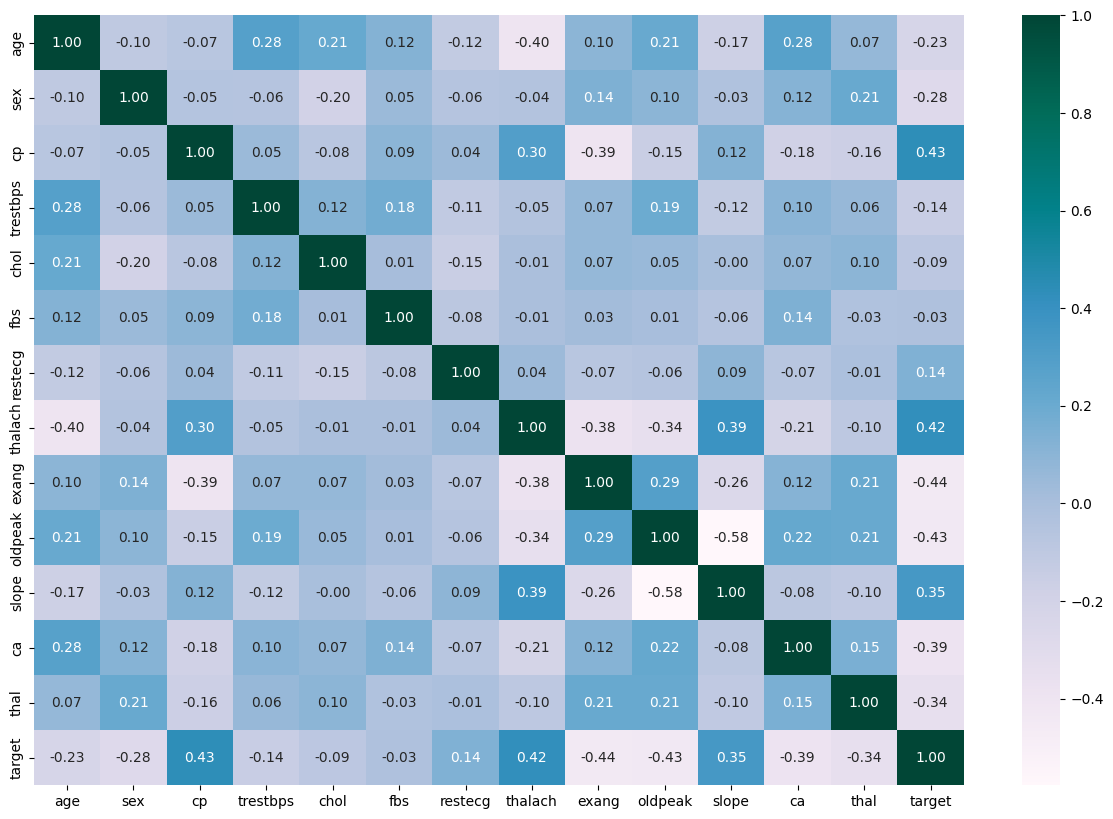

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt= '.2f', cmap='PuBuGn');

Noteworthy is the correlation value for fbs, which was plotted earlier. It is the one closest to 0 of all present, vs  target column, meaning its influence on the target should be minimal. However, this does not necessarily mean that it should be discarded. It could still be useful when combined with other features.

## Model driven EDA:

In [14]:
# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target'].values

In [15]:
# Set up random seed
np.random.seed(42)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
print(f'size of X_train: {len(X_train)} size of X_test: {len(X_test)}')

size of X_train: 242 size of X_test: 61


Our data is set up for training. Normally, at this point, it would be a good place to normalize certain features so that their magnitude is on par with other features. We generally require normalization for PCA, KNN, Clustering, SVM, Ridge Regression, Lasso Regression and do not need it in Tree Based and Logistic Regression.

In [17]:
# Set up dictionary for selected models and thier scores
model_dict = {'LogisticRegression' : LogisticRegression(),
              'RandomForest' : RandomForestClassifier(),
              'KNN': KNeighborsClassifier()}

# Set up dictionary with all hyperparameters used for each model (for hyperparameter tunning later on)
default_params = {}

In [18]:
def fit_models(model_grid, X_train, y_train, X_test, y_test):
    """
    Fits models specified inside model_grid and saves thier score
    :param model: dict containing wanted models
    :X_train: pd dataframe with training features
    :y_train: pd dataframe with training target
    :X_test: pd dataframe with testing features
    :y_test: pd dataframe with testing target
    :return: dict with model scores
    """
    # Set up random seed
    np.random.seed(42)
    
    # Set up score dictionary
    model_scores = {}
    
    for name, model in model_grid.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        default_params[name] = model.get_params()
    return model_scores

In [19]:
model_scores = fit_models(model_dict, X_train, y_train, X_test, y_test)
print(model_scores)

{'LogisticRegression': 0.8852459016393442, 'RandomForest': 0.8360655737704918, 'KNN': 0.6885245901639344}


/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After visualization:

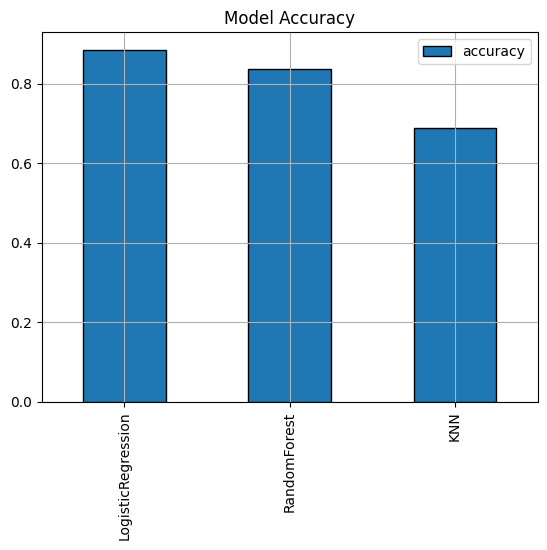

In [20]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot(kind='bar', grid=True, edgecolor='black', title='Model Accuracy');

## Hyperparameter tunning:

### KNN tunning:

In [21]:
# Scores
train_scores = []
test_scores = []

# List wanted hyperparameters values to loop by
no_nn = range(1,21)

# Initialize classifier instance
knn = KNeighborsClassifier()

# Train and score models for each n value from list
for i in no_nn:
    knn.set_params(n_neighbors = i)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # save train score
    train_scores.append(knn.score(X_train, y_train))
    
    # save test score
    test_scores.append(knn.score(X_test, y_test))
    
print(f"Train scores:\n{train_scores}\n Test scores:\n {test_scores}")

Train scores:
[1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
 Test scores:
 [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


We can confirm that scores are between 0 and 1, which is the magnitude they should be in.

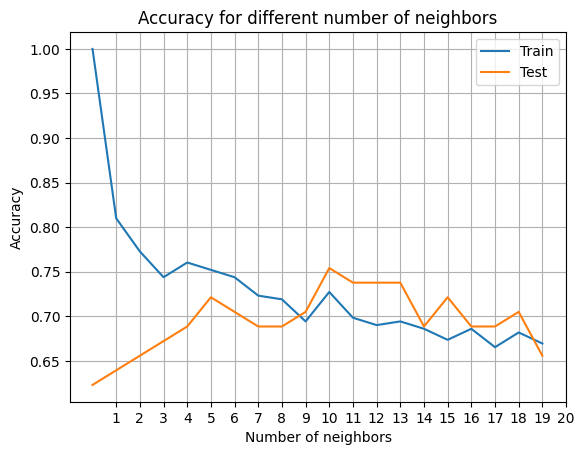

In [22]:
knn_n_compare = pd.DataFrame([train_scores, test_scores], index = ['Train', 'Test'])
knn_n_compare.T.plot(kind='line', grid=True, title='Accuracy for different number of neighbors',
                             xlabel = 'Number of neighbors', ylabel='Accuracy', xticks=np.arange(1,21,1));

In [23]:
test_scores.index(max(test_scores))

10

In [24]:
max(test_scores)

0.7540983606557377

Given the range of neighbors provided, the model performed best at 10 neighbors and achieved approx. 75% accuracy. It is still much lower than the other 2 models even without tuning, so for now, let's focus on them.

### RandomForest:

In [25]:
# Create a grid of random forest hyperparameters to tune
rf_grid = {'n_estimators':np.arange(10, 2000, 10),
           'criterion':['gini', 'entropy', 'log_loss'],
           'max_depth':np.arange(1, 20, 1),
           'min_samples_split':np.arange(2, 10, 1),
           'min_samples_leaf':np.arange(1, 10, 1)}

# Use random seed to get constant results
np.random.seed(42)

# Use RandomSearchCV to try to find better combination of hyperparameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid, n_iter = 10, cv=5, verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [26]:
# Display the best combination of hyperparameters discovered
rs_rf.best_params_

{'n_estimators': 280,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': 10,
 'criterion': 'gini'}

In [27]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [28]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'RandomForest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

As we can see, the model was improved by approximately 3% in accuracy. While we could use GridSearch to get an in-depth dive to get the best hyperparameters possible, it is a good time to realize that even without hyperparameter tuning, the LogisticRegression model still outperforms the other 2. With that being said the next goal will be to run GridSearch on Logistic Regression. It is a more costly method, but by now it's fair to say that Logistic Regression is the model to go with in this case, and GridSearch will allow us to get (potentially) even better hyperparameters

### Logistic Regression:

Logistic regression fails to converge for some hyperparameters. Normally we could just pick one that does converge, but RandomSearch and GridSearch iterate through different combinations of them, often leading to that error. For that reason, the warning package was imported, to avoid the notebook being clogged with convergence warnings for each iteration that failed. It is recommended to run the code without it first and understand these error messages, but in the final iteration, it would look much better without it.

In [29]:
# Comment out line below, if you want to see messages
warnings.simplefilter('ignore', category=ConvergenceWarning)

This will filter out convergence warnings, which will greatly improve the clarity of the notebook. ValueError will appear in the next code blocks, but those will disappear by tweaking hyperparameters.

In [30]:
# Create a grid of logistic regression hyperparameters to tune
log_reg_grid = {'C' : np.logspace(0, 3, 10),
                'penalty' : ['l1', 'l2', 'elasticnet'],
                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter' : np.arange(100, 1000, 100)}

# Use random seed
np.random.seed(42)

# Use RandomSearchCV to get general idea and not wast a lot of time/resoures
rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_grid, n_iter=500, cv=5)

rs_log_reg.fit(X_train, y_train)

/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1325 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **k

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=500,
                   param_distributions={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ]),
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [31]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [32]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'RandomForest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 1.0}

With RandomizedSearchCV accuracy achieved was smaller than the one achieved with default hyperparameters. This makes me think that the default values in that case might be very well chosen. To make sure that's the case in the following GridSearchCV I made sure to include a default values among some different ones in order to make a thorough search and discover if that's really the case.

In [34]:
# Create a grid of logistic regression hyperparameters to tune
log_reg_grid_2 = { 
                'C' : [1.0, 0.1, 0.01, 0.001, 0.0001],
                'penalty' : ['l1', 'l2'],
                'solver' : ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs'],
                'max_iter' : [100, 1000, 2000, 3000]
                }


# Use random seed
np.random.seed(42)

# Use RandomSearchCV to get general idea and not waste a lot of time/resoures
gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_grid_2, cv=5)

gs_log_reg.fit(X_train, y_train)

/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/peter/PycharmProjects/ML_course/Heart_disease_classification/env/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kw

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'sag',
                                    'lbfgs']})

In [35]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [36]:
gs_log_reg.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Many interesting things happened here:
* Some combinations of hyperparameters are not compatible with each other
* The score is lower than the one achieved by the default value (which was present inside the grid)
* At the same time, the score is the same as the one from RandomisedSearchCV
* 300 out of 1000 combinations failed for different reasons, but that is to be expected if all values are input into a single grid. The next move is to create more different grids with combinations that are compatible with each other without anything else

This highlighted that there is a problem with the current approach, one should expect that with default parameters included, the accuracy should be at least the same. The one obtained was lower, so let's check if these three separate grids will yield more accuracy

### newton-cg solver:

In [37]:
# Create a grid of logistic regression hyperparameters to tune
log_reg_grid_newton = { 
                'C' : [1.0, 0.1, 0.01, 0.001, 0.0001],
                'penalty' : ['l2'],
                'solver' : ['newton-cg'],
                'max_iter' : [100, 1000, 2000, 3000]
                }


# Use random seed
np.random.seed(42)

# Use RandomSearchCV to get general idea and not waste a lot of time/resoures
gs_log_reg_newton = GridSearchCV(LogisticRegression(), log_reg_grid_newton, cv=5)

gs_log_reg_newton.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [100, 1000, 2000, 3000], 'penalty': ['l2'],
                         'solver': ['newton-cg']})

In [38]:
gs_log_reg_newton.score(X_test, y_test)

0.8852459016393442

In [39]:
gs_log_reg_newton.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

### sag solver:

In [40]:
# Create a grid of logistic regression hyperparameters to tune
log_reg_grid_sag = { 
                'C' : [1.0, 0.1, 0.01, 0.001, 0.0001],
                'penalty' : ['l2'],
                'solver' : ['sag'],
                'max_iter' : [100, 1000, 2000, 3000]
                }


# Use random seed
np.random.seed(42)

# Use RandomSearchCV to get general idea and not waste a lot of time/resoures
gs_log_reg_sag = GridSearchCV(LogisticRegression(), log_reg_grid_sag, cv=5)

gs_log_reg_sag.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [100, 1000, 2000, 3000], 'penalty': ['l2'],
                         'solver': ['sag']})

In [41]:
gs_log_reg_sag.score(X_test, y_test)

0.8688524590163934

In [42]:
gs_log_reg_sag.best_params_

{'C': 1.0, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'sag'}

### lbfgs solver:

In [43]:
# Create a grid of logistic regression hyperparameters to tune
log_reg_grid_lbfgs = { 
                'C' : [1.0, 0.1, 0.01, 0.001, 0.0001],
                'penalty' : ['l2'],
                'solver' : ['lbfgs'],
                'max_iter' : [100, 1000, 2000, 3000]
                }


# Use random seed
np.random.seed(42)

# Use RandomSearchCV to get general idea and not waste a lot of time/resoures
gs_log_reg_lbfgs = GridSearchCV(LogisticRegression(), log_reg_grid_lbfgs, cv=5)

gs_log_reg_lbfgs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'max_iter': [100, 1000, 2000, 3000], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [44]:
gs_log_reg_lbfgs.score(X_test, y_test)

0.8852459016393442

In [45]:
gs_log_reg_lbfgs.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [46]:
default_params['LogisticRegression']

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

After some experimentation, it finally showed that the result of a GridSearch is the same accuracy as the default one. This is acceptable and was fixed by making separate grids that have compatible hyperparameters each. Additionally, it turns out that 'newton-cg' and 'lbfgs' are tied for the best accuracy model. Taking all this into consideration, let's keep the default values.

## Evaluation:

This section will really provide us with information which model\hyperparameters performed the best. To our knowledge right now, we have a close call between newton-cg and lbfgs solvers for logistic regression. Let's see how they perform in more detail.

In [47]:
# Predict data for 2 logistic regression models
y_pred = gs_log_reg_newton.predict(X_test)
y_pred_2 = gs_log_reg_lbfgs.predict(X_test)

### ROC Curve:

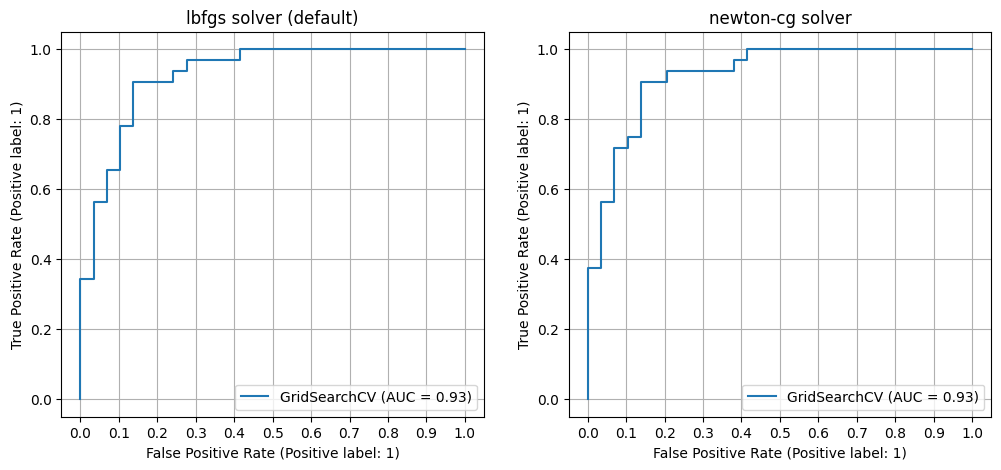

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

RocCurveDisplay.from_estimator(estimator = gs_log_reg_lbfgs, X = X_test, y = y_test, ax=ax1)
ax1.set_title("lbfgs solver (default)")
ax1.grid(True)
ax1.set_xticks(np.arange(0, 1.1, 0.1));

RocCurveDisplay.from_estimator(estimator = gs_log_reg_newton, X = X_test, y = y_test, ax=ax2)
ax2.set_title("newton-cg solver")
ax2.grid(True)
ax2.set_xticks(np.arange(0, 1.1, 0.1));

While in both cases the same AUC score was achieved, the difference in accuracy was not that great to begin with, so that is to be expected. It is the shape that differs the most, but it is still fairly similar.

### Confusion matrix:

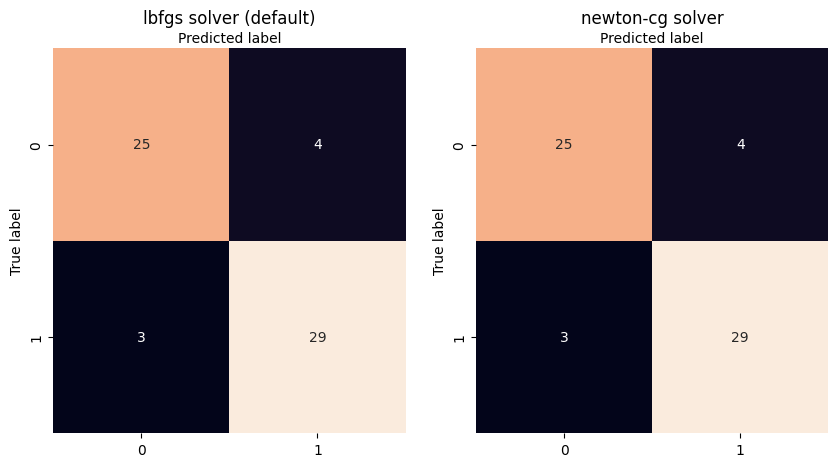

In [49]:
def plot_confusion_matrix(y_test, y_pred, title, ax):
    """
    Plots confusion matrix from actual data and predictions using heatmap()
    :y_test: actual values to be predicted
    :y_pred: predicted values of trained model
    :title: string with name of confusion matrix
    :ax: ax the matrix will go to
    :return: None
    """
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, ax=ax)
    ax.set_xlabel("Predicted label") 
    ax.set_ylabel("True label") 
    ax.set_title(title)
    ax.xaxis.set_label_position('top')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
plot_confusion_matrix(y_test, y_pred_2, "lbfgs solver (default)", ax=ax1)
plot_confusion_matrix(y_test, y_pred, "newton-cg solver", ax=ax2)
plt.show()

In terms of the confusion matrix, both models perform the same

### Classification report:

In [50]:
print(f'''
Report for lbfgs model: \n{classification_report(y_test, y_pred_2)}
Report for newton-cg model: \n{classification_report(y_test, y_pred)}
''')


Report for lbfgs model: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Report for newton-cg model: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




All metrics presented here were calculated using only one split. More stable metrics would be calculated on different splits, which will be done in the next section.

### Cross validated scores:

In this section, the most important metrics will be calculated using 5-fold cross-validation. The result will be the mean of all 5 results. This will provide a more dependable outlook on how models behave depending on the data.

### Accuracy:

In [51]:
# newton-cg accuracy
cv_acc_newton = np.mean(cross_val_score(gs_log_reg_newton, X, y,
                                cv=5, scoring='accuracy'))
# lbfgs accuracy
cv_acc_lbfgs = np.mean(cross_val_score(gs_log_reg_lbfgs, X, y,
                                cv=5, scoring='accuracy'))

In [52]:
print(f'''cv_acc_newton: \n{cv_acc_newton}
cv_acc_lbfgs: \n{cv_acc_lbfgs}''')

cv_acc_newton: 
0.834808743169399
cv_acc_lbfgs: 
0.8380874316939891


### Precision:

In [53]:
# newton-cg precision
cv_prec_newton = np.mean(cross_val_score(gs_log_reg_newton, X, y,
                                cv=5, scoring='precision'))
# lbfgs precision
cv_prec_lbfgs = np.mean(cross_val_score(gs_log_reg_lbfgs, X, y,
                                cv=5, scoring='precision'))

In [54]:
print(f'''cv_prec_newton: \n{cv_prec_newton}
cv_prec_lbfgs: \n{cv_prec_lbfgs}''')

cv_prec_newton: 
0.8141448138506961
cv_prec_lbfgs: 
0.8191596638655462


### Recall:

In [55]:
# newton-cg recall
cv_rec_newton = np.mean(cross_val_score(gs_log_reg_newton, X, y,
                                cv=5, scoring='recall'))
# lbfgs recall
cv_rec_lbfgs = np.mean(cross_val_score(gs_log_reg_lbfgs, X, y,
                                cv=5, scoring='recall'))

In [56]:
print(f'''cv_recall_newton: \n{cv_rec_newton}
cv_recall_lbfgs: \n{cv_rec_lbfgs}''')

cv_recall_newton: 
0.9090909090909092
cv_recall_lbfgs: 
0.9090909090909092


### F1 score:

In [57]:
# newton-cg f1 score
cv_f1_newton = np.mean(cross_val_score(gs_log_reg_newton, X, y,
                                cv=5, scoring='f1'))
# lbfgs f1 score
cv_f1_lbfgs = np.mean(cross_val_score(gs_log_reg_lbfgs, X, y,
                                cv=5, scoring='f1'))

In [58]:
print(f'''cv_f1_newton: \n{cv_f1_newton}
cv_f1_lbfgs: \n{cv_f1_lbfgs}''')

cv_f1_newton: 
0.8582009029332444
cv_f1_lbfgs: 
0.8607249810576448


### Visualization:

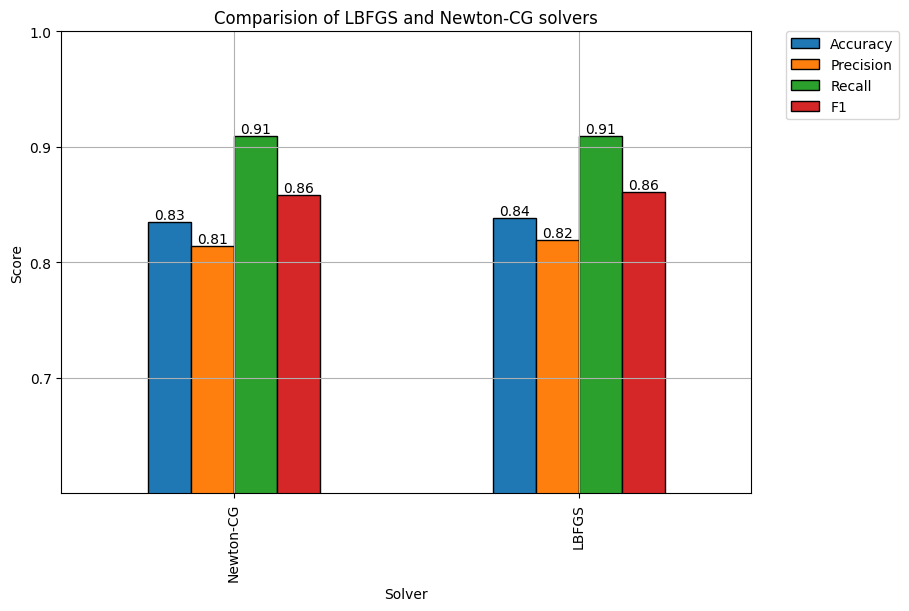

In [59]:
# Visualizing cross-validated metrics
# create dataframe for newton-cg solver metrics
cv_metrics_newton = pd.DataFrame({"Solver":"Newton-CG",
                               "Accuracy": cv_acc_newton,
                               "Precision": cv_prec_newton,
                               "Recall": cv_rec_newton,
                               "F1": cv_f1_newton},
                               index=[0])
# create dataframe for LBFGS solver metrics
cv_metrics_lbfgs = pd.DataFrame({"Solver": "LBFGS",
                               "Accuracy": cv_acc_lbfgs,
                               "Precision": cv_prec_lbfgs,
                               "Recall": cv_rec_lbfgs,
                               "F1": cv_f1_lbfgs},
                              index=[0])

# Merge into single df and format it's index
merged_df = cv_metrics_newton.append(cv_metrics_lbfgs, ignore_index=True)
merged_df.set_index('Solver', inplace=True)

# Plot the figure.
ax = merged_df.plot(kind='bar', grid=True, figsize=(12,6), edgecolor='black')
plt.title("Comparision of LBFGS and Newton-CG solvers")
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.subplots_adjust(right=0.7)
plt.yticks([0.7, 0.8, 0.9, 1.0])
plt.ylim(0.6, 1.0)

# Add the labels to the bars
for i in range(len(ax.containers)):
       ax.bar_label(ax.containers[i], fmt='%.2f')

plt.show()

A perfect score for all metrics listed above would be 1. We can see that both solvers performed very similarly, but ultimately, Lbfgs had better accuracy and precision scores. This highlights the importance of cross-validation, as without it, scores for both models would be the same.

This concludes the evaluation section. We managed to test different hyperparameters and select the one that performed the best. While we could try to achieve an even better score, it would probably make more sense to collect more data or use XGboost models instead. We could also try removing some features that have less of an impact on the model.

### Feature impact analysis:

Let's recall the correlation matrix to get a brief overview of how different columns impact the model.

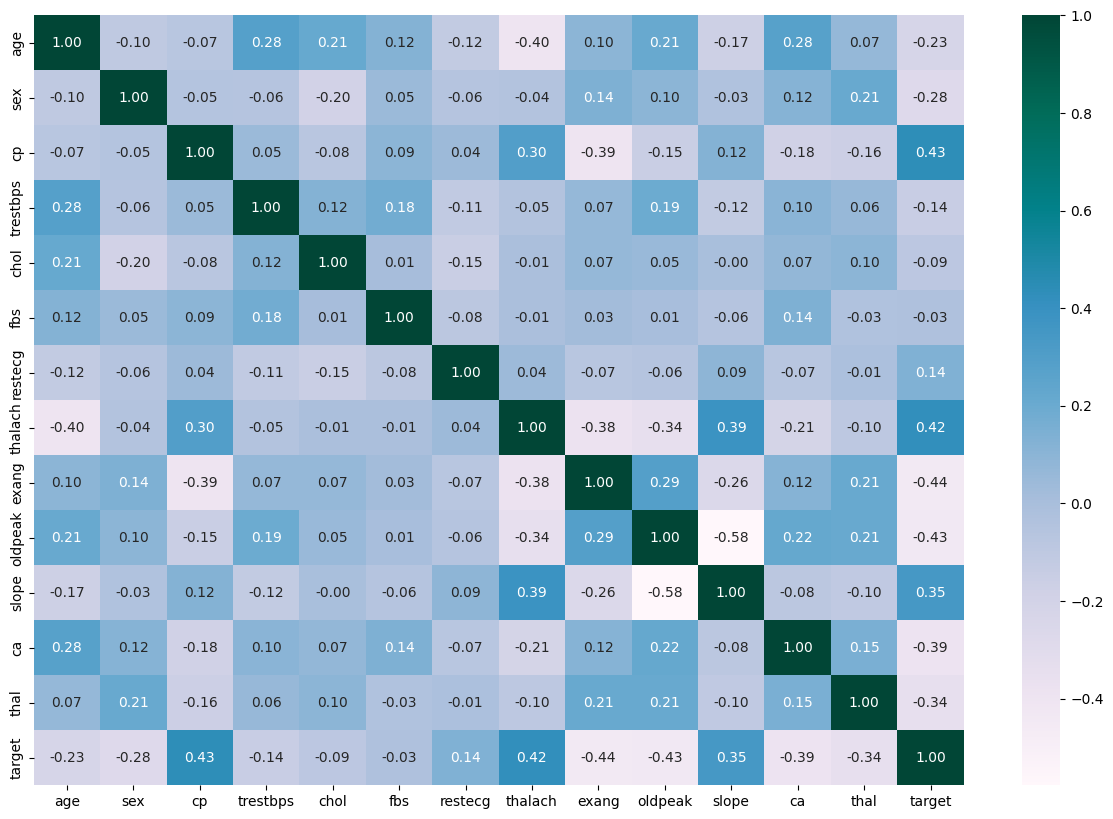

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt= '.2f', cmap='PuBuGn');

Let's focus on where different columns meet the target column. Those values represent how much of an impact the value has on the target. The closer the value is to 0, the smaller the impact it should have. This, however, doesn't necessarily mean the model will depend on the same values. In fact, it leaves some blank spots because: 
* Correlation assumes that the features are independent
* A feature might have a high correlation with the target variable, but it might not be important in a specific model
* It does not capture the complexity of relationships that might exist in your data (it measures the linear relationship between two variables)

It is more useful during exploratory analysis, and now that we have already selected the model and its parameters, we should use model-specific means of measuring feature importance

Since we selected logistic regression as our model, let's use it to understand its features and importance.

In [61]:
# Recall parameters found via gridsearch for lbfgs
gs_log_reg_lbfgs.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [62]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=1.0, max_iter=100, penalty='l2', solver='lbfgs')

clf.fit(X_train, y_train);

In [63]:
# Coefficient of the features in the decision function.
clf.coef_


array([[ 9.76802363e-03, -1.15904135e+00,  8.32788171e-01,
        -1.18396383e-02, -9.42671476e-04, -1.26616957e-03,
         4.94375198e-01,  2.73001665e-02, -8.08995940e-01,
        -7.18430987e-01,  5.88435910e-01, -8.29985656e-01,
        -1.04528841e+00]])

In [64]:
np.shape(clf.coef_)

(1, 13)

The values expressed in a vector above represent how much each feature has an influence on the model in a simillar way the correlation matrix does. Now, however, it is LogisticRegression specific and takes more into account. It is not very readable right now, so let's assign a name to each value.

In [65]:
features_dict = dict(zip(df.columns, clf.coef_[0]))
features_dict

{'age': 0.00976802363174151,
 'sex': -1.1590413525644203,
 'cp': 0.8327881714307941,
 'trestbps': -0.011839638292690337,
 'chol': -0.0009426714759425262,
 'fbs': -0.0012661695740535618,
 'restecg': 0.4943751978582829,
 'thalach': 0.027300166533836503,
 'exang': -0.8089959399226937,
 'oldpeak': -0.7184309865960169,
 'slope': 0.5884359099206564,
 'ca': -0.8299856564956426,
 'thal': -1.045288412365012}

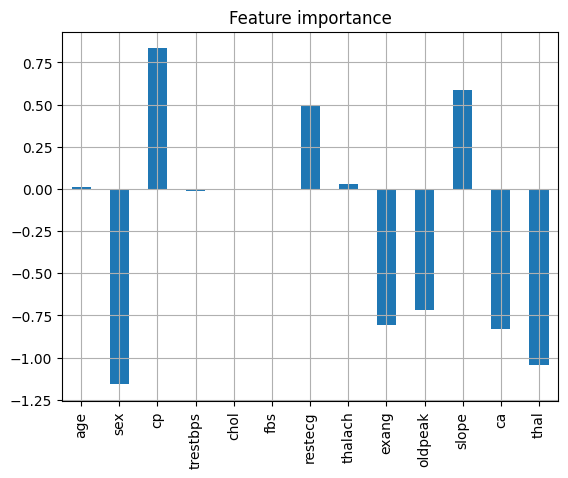

In [66]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot(kind='bar', title="Feature importance", legend=False, grid=".");

The above plot represents how much of an effect the feature has on the model, where values near 0 mean almost no effect and values that have the largest bar (regardless of which direction) have the most of an effect. When ether value is positive or negative, it only means if the target increases or decreases with the increase of the feature (negative/positive correlation). The 0 values basically mean that regardless of changes in features, the model performs the same.

What is interesting is that there are significant differences from the idea that was presented in the correlation matrix. Our model's most important feature was sex, while in the correlation matrix it has much less importance.

This is important to understand because, while the correlation matrix is a great EDA tool, the final result will most likely be different (due to the model-specific approach).

### Conclusion:

In conclusion, the project successfully used machine learning to classify whether a patient has heart disease with 83% accuracy. While that score is not sufficient to consistently make life-saving decisions, the process of getting that score revealed much about what was important to make that decision. The LogisticRegression model was found to be the most accurate, with the most important feature being sex. The project also demonstrated the importance of feature importance analysis and hyperparameter tuning in machine learning model development. Future work could include collecting more data or using more complex models to improve the model's performance.